# CNN (Week 1 & 2)

Cats vs. Dogs

Image Augmentation

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-02-07 00:31:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   137MB/s    in 0.5s    

2022-02-07 00:31:52 (137 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

path = './cats_and_dogs_filtered'
train = os.path.join(path, 'train')
cats_train = os.path.join(train, 'cats')
dogs_train = os.path.join(train, 'dogs')
validation = os.path.join (path, 'validation')
cats_validation = os.path.join(validation, 'cats')
dogs_validation = os.path.join (validation, 'dogs')

In [ ]:
print(len(os.listdir(cats_train)))
print(len(os.listdir(dogs_train)))
print(len(os.listdir(cats_validation)))
print(len(os.listdir(cats_validation)))

1000
1000
500
500


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_file = os.path.join(cats_train, 'cat.0.jpg')
img_file = mpimg.imread(img_file)
plt.imshow(img_file)
# img_file.shape

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True, fill_mode='nearest')

train_generator = train_gen.flow_from_directory (train, target_size=(150,150), class_mode='binary', batch_size=20)

val_gen = ImageDataGenerator(rescale=1/255)

val_generator = train_gen.flow_from_directory (validation, target_size=(150,150), class_mode='binary', batch_size=20)



In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu',))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu',))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer ='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_generator, steps_per_epoch=100, epochs=15, validation_data=val_generator, validation_steps=50)

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = model.history.history[     'accuracy' ]
val_acc  = model.history.history[ 'val_accuracy' ]
loss     = model.history.history[    'loss' ]
val_loss = model.history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Week 3: Transfer Learning

For this assignment, you will use the Horse or Human dataset, which contains images of horses and humans.

Download the training and validation sets by running the cell below:

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
# Get the Horse or Human training dataset
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

# Get the Horse or Human validation dataset
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

test_local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/training')

val_local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/validation')

zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 59.1MB/s]


In [ ]:
train_dir = '/tmp/training'
val_dir = '/tmp/validation'

train_dir_horses = os.path.join ('/tmp/training', 'horses')
train_dir_humans = os.path.join ('/tmp/training', 'humans')
val_dir_horses = os.path.join ('/tmp/validation', 'horses')
val_dir_humans = os.path.join ('/tmp/validation', 'humans')

print(f"train_horses: {len(os.listdir(train_dir_horses))}")
print(f"train_humans: {len(os.listdir(train_dir_humans))}")
print(f"val_horses: {len(os.listdir(val_dir_horses))}")
print(f"val_humans: {len(os.listdir(val_dir_humans))}")

train_horses: 500
train_humans: 527
val_horses: 128
val_humans: 128


In [ ]:
img_file = os.listdir(train_dir_horses)[1]
plt.imshow(load_img(os.path.join(train_dir_horses, img_file)))

In [ ]:
img = img_to_array(load_img(os.path.join(train_dir_horses, img_file)))
img_to_array(img).shape

(300, 300, 3)

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_gen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 32, class_mode='binary')

val_gen = ImageDataGenerator(rescale=1/255)

val_generator = val_gen.flow_from_directory(val_dir, target_size = (150,150), batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end (self, epoch, logs={}):
    if logs.get ('accuracy') > 0.999:
      print('\nReached 99.9% accuracy')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

Download the inception V3 weights into the /tmp/ directory:

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-02-09 02:37:47--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   217MB/s    in 0.4s    

2022-02-09 02:37:47 (217 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pre_trained_model = InceptionV3(input_shape= (150,150,3), weights=None,
                                include_top = False)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
last_desired_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_desired_layer.output_shape)
last_output = last_desired_layer.output
print('last layer output', last_output)

last layer output shape: (None, 7, 7, 768)
last layer output KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
x = layers.Flatten ()(last_output)

x = layers.Dense (1024, activation='relu')(x)
x = layers.Dropout (0.2)(x)
x = layers.Dense (1, activation='sigmoid')(x)

model = Model(inputs= pre_trained_model.input, outputs = x)

model.compile (optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks= callbacks)

# **Week 4: Multi-class Classification**

Welcome to this assignment! In this exercise, you will get a chance to work on a multi-class classification problem. You will be using the Sign Language MNIST dataset, which contains 28x28 images of hands depicting the 26 letters of the english alphabet.

You will need to pre-process the data so that it can be fed into your convolutional neural network to correctly classify each image as the letter it represents.

In [13]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [14]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 258MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 242MB/s]


In [15]:
with open('sign_mnist_train.csv') as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

with open('sign_mnist_test.csv') as test_file:
  line = test_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = test_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [16]:
with open('sign_mnist_train.csv') as training_file:
  train_reader = csv.reader(training_file, delimiter=',')

  train_labels = []
  train_pixels = []

  next(train_reader)
  for line in train_reader:
    train_labels.append(line[0])
    train_pixels.append(line[1:])


train_labels = np.ndarray.astype(np.array(train_labels), 'float64')
train_pixels = np.ndarray.astype(np.array(train_pixels), 'float64')

train_pixels = train_pixels.reshape(27455, 28,28)

In [17]:
with open('sign_mnist_test.csv') as test_file:
  test_reader = csv.reader(test_file, delimiter=',')

  test_labels = []
  test_pixels = []

  next(test_reader)
  for line in test_reader:
    test_labels.append(line[0])
    test_pixels.append(line[1:])


test_labels = np.ndarray.astype(np.array(test_labels), 'float64')
test_pixels = np.ndarray.astype(np.array(test_pixels), 'float64')

test_pixels = test_pixels.reshape(7172, 28,28)

In [ ]:
img = train_pixels[1,]
img = np.expand_dims (img, axis=-1)
img = array_to_img(img)
plt.imshow(img,cmap="Greys_r")

In [ ]:
img = train_pixels[1,]
plt.imshow(img,cmap="Greys_r")

In [24]:
a = np.expand_dims(train_pixels, axis=-1) 
a.shape

(27455, 28, 28, 1)

In [25]:
train_pixels = np.expand_dims(train_pixels, axis=-1)
test_pixels = np.expand_dims(test_pixels, axis=-1)

In [27]:
train_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_gen.flow(train_pixels, train_labels)

test_gen = ImageDataGenerator (rescale=1/255)

test_generator = test_gen.flow(test_pixels, test_labels)

In [49]:
from tensorflow.python.keras.layers.core import Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters= 32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense (512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(26, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(train_generator, epochs=15, validation_data=test_generator)

Epoch 1/15
858/858 [==============================] - 6s 6ms/step - loss: 0.8272 - accuracy: 0.7532 - val_loss: 0.3130 - val_accuracy: 0.8977
Epoch 2/15
858/858 [==============================] - 4s 5ms/step - loss: 0.0605 - accuracy: 0.9850 - val_loss: 0.2108 - val_accuracy: 0.9335
Epoch 3/15
858/858 [==============================] - 4s 5ms/step - loss: 0.0200 - accuracy: 0.9956 - val_loss: 0.2168 - val_accuracy: 0.9416
Epoch 4/15
858/858 [==============================] - 4s 5ms/step - loss: 0.0186 - accuracy: 0.9950 - val_loss: 0.2291 - val_accuracy: 0.9371
Epoch 5/15
858/858 [==============================] - 4s 5ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.2403 - val_accuracy: 0.9336
Epoch 6/15
858/858 [==============================] - 4s 5ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.3323 - val_accuracy: 0.9327
Epoch 7/15
858/858 [==============================] - 4s 5ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.1744 - val_accuracy: 0.9580
Epoch 

In [43]:
train_loss = model.history.history['loss']
train_acc = model.history.history['accuracy']
test_loss = model.history.history['val_loss']
test_acc = model.history.history['val_accuracy']

epochs = range(len(train_loss))

<Figure size 432x288 with 0 Axes>

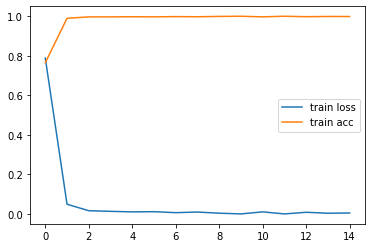

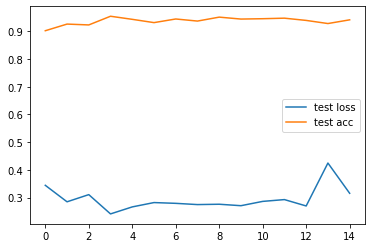

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(epochs, train_loss, label='train loss' )
plt.plot(epochs, train_acc, label='train acc')
plt.legend()
plt.figure()

plt.plot(epochs, test_loss, label='test loss' )
plt.plot(epochs, test_acc, label='test acc')
plt.legend()
plt.figure()

